In [1]:
import librosa
import librosa.display
# matplotlib for displaying the output
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [3]:
from scipy import signal

In [4]:
import numpy as np

# Item A

In [5]:
x, sr = librosa.load('/content/drive/My Drive/Colab Notebooks/audio_ml/lista_2/enunciado_a.wav', sr = 16000, mono = False)

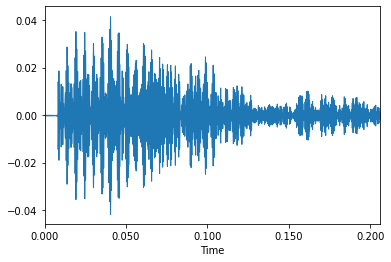

In [6]:
librosa.display.waveplot(x, sr=sr)

In [7]:
a = librosa.lpc(x, order=14)

In [8]:
a

array([ 1.        , -2.8543952 ,  3.50835   , -2.4374216 ,  1.3864208 ,
       -1.3521457 ,  1.6498429 , -1.1691748 ,  0.5218989 , -0.40946016,
        0.4585441 , -0.39107504,  0.17210838,  0.09474599, -0.0828443 ],
      dtype=float32)

In [9]:
w, h = signal.freqz(a, fs=100530.9648)

<Figure size 1440x504 with 0 Axes>

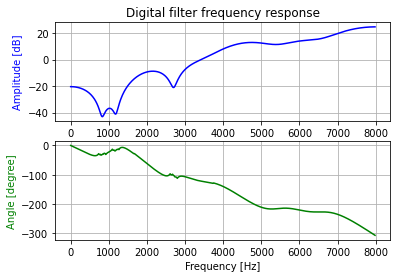

In [10]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20, 7))
fig, ax1 = plt.subplots(2)
ax1[0].set_title('Digital filter frequency response')

ax1[0].plot(w/6.2831853, 20 * np.log10(abs(h)), 'b')
ax1[0].set_ylabel('Amplitude [dB]', color='b')
ax1[0].set_xlabel('Frequency [Hz]')
ax1[0].grid(True)
ax1[0].axis('tight')

# ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h, deg=True))
ax1[1].plot(w/6.2831853, angles, 'g')
ax1[1].set_ylabel('Angle [degree]', color='g')
ax1[1].set_xlabel('Frequency [Hz]')
ax1[1].grid(True)
ax1[1].axis('tight')
plt.show()

In [11]:
b = np.hstack([[0], -1 * a[1:]])
b

array([ 0.        ,  2.85439515, -3.5083499 ,  2.43742156, -1.38642085,
        1.35214567, -1.64984286,  1.16917479, -0.52189893,  0.40946016,
       -0.45854411,  0.39107504, -0.17210838, -0.09474599,  0.0828443 ])

Text(0.5, 1.0, 'LP Model Forward Prediction')

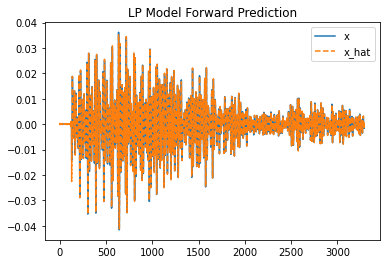

In [12]:
import scipy
x_hat = scipy.signal.lfilter(b, [1], x)
fig, ax = plt.subplots()
ax.plot(x)
ax.plot(x_hat, linestyle='--')
ax.legend(['x', 'x_hat'])
ax.set_title('LP Model Forward Prediction')

In [13]:
from scipy.signal import find_peaks
peaks, di_peaks = find_peaks(-20 * np.log10(abs(h)), height=0)
peaks

array([ 53,  75, 173])

In [14]:
di_peaks

{'peak_heights': array([43.07300949, 41.10690308, 21.04777145])}

In [15]:
w[53]/6.2831853, w[75]/6.2831853, w[173]/6.2831853

(828.1249999999999, 1171.875, 2703.1249999999995)

# Item b

In [16]:
x_fir = librosa.effects.preemphasis(x, coef=0.97)

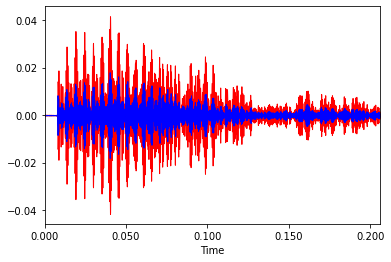

In [17]:
librosa.display.waveplot(x, sr, color = 'red')
librosa.display.waveplot(x_fir, sr, color = 'blue')

In [18]:
a = librosa.lpc(x_fir, order=14)

Text(0.5, 1.0, 'LP Model Forward Prediction')

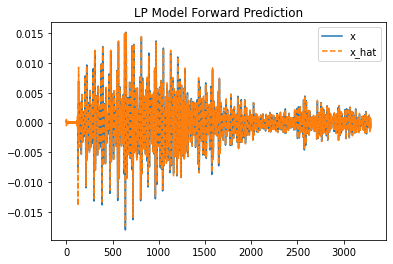

In [19]:
b = np.hstack([[0], -1 * a[1:]])
x_hat = scipy.signal.lfilter(b, [1], x_fir)
fig, ax = plt.subplots()
ax.plot(x_fir)
ax.plot(x_hat, linestyle='--')
ax.legend(['x', 'x_hat'])
ax.set_title('LP Model Forward Prediction')

In [23]:
a

array([ 1.        , -1.9322424 ,  1.7237623 , -0.8917294 ,  0.6452667 ,
       -0.85329735,  0.9523051 , -0.39591312,  0.36927125, -0.39645332,
        0.36627197, -0.31799376,  0.32829925, -0.27950686,  0.24601543],
      dtype=float32)

In [20]:
w, h = signal.freqz(a, fs=100530.9648)

<Figure size 1440x504 with 0 Axes>

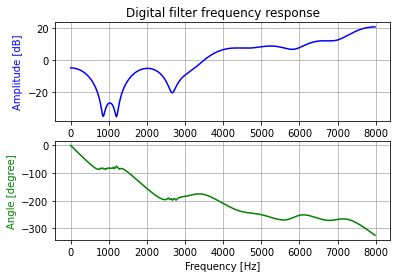

In [21]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20, 7))
fig, ax1 = plt.subplots(2)
ax1[0].set_title('Digital filter frequency response')

ax1[0].plot(w/6.2831853, 20 * np.log10(abs(h)), 'b')
ax1[0].set_ylabel('Amplitude [dB]', color='b')
ax1[0].set_xlabel('Frequency [Hz]')
ax1[0].grid(True)
ax1[0].axis('tight')

# ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h, deg=True))
ax1[1].plot(w/6.2831853, angles, 'g')
ax1[1].set_ylabel('Angle [degree]', color='g')
ax1[1].set_xlabel('Frequency [Hz]')
ax1[1].grid(True)
ax1[1].axis('tight')
plt.show()

In [22]:
from scipy.signal import find_peaks
peaks, di_peaks = find_peaks(-20 * np.log10(abs(h)), height=0)
peaks

array([ 55,  77, 171])

In [24]:
w[52]/6.2831853, w[77]/6.2831853, w[171]/6.2831853

(812.5, 1203.125, 2671.8749999999995)